In [64]:
import sys
import json
import pathlib
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import numpy as np
import random

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})

unbalanced_channels = []
successRate = []

In [65]:
def get_data(file):
    f = open(file,)
    jsonData = json.load(f)
    f.close()
    return float(jsonData['Success']['Mean']) * 100
    # print(data)

def add_new_data(directory):
    for file in pathlib.Path(directory).glob('*'):
        if str(file).split('/')[-1] == "cloth_output.json":
            unbalanced_channels.append(int(str(file).split('/')[1]) / 304.57)
            successRate.append(get_data(file))
            # get_data(file)

In [66]:
output_dir = "networks"
for directory in pathlib.Path(output_dir).glob('*'):
    # if str(directory) != "networks/all-channels":
    add_new_data(str(directory))
print(unbalanced_channels)
print(successRate)

[100.0, 88.64957152707096, 34.4748333716387, 29.549857175690317, 59.099714351380634, 98.49952391896772, 19.699904783793546, 73.8746429392258, 4.924976195948386, 24.62488097974193, 64.02469054732903, 14.774928587845158, 39.39980956758709, 83.72459533112257, 68.9496667432774, 93.57454772301934, 49.24976195948386, 9.849952391896773, 78.79961913517418, 44.32478576353548, 54.17473815543225]
[18.534228159999998, 56.75757863999999, 85.00919131, 87.68729668, 74.10254277, 35.861275129999996, 90.61193752, 67.24435118, 97.02755433, 89.18123608, 72.9490791, 93.24976199, 83.1112918, 61.62302429, 70.71252219, 51.53260048, 78.80306037, 94.56137106, 64.62031147, 81.76023223, 77.39476466]


Text(0, 0.5, 'Success rate')

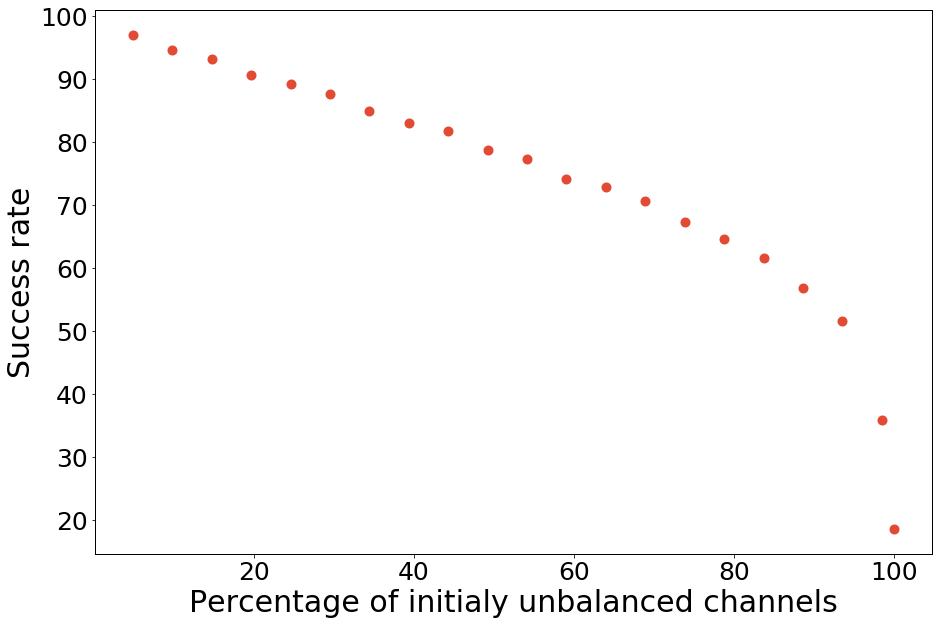

In [72]:
plt.scatter(unbalanced_channels, successRate, linewidth=4)

plt.xlabel("Percentage of initialy unbalanced channels")
plt.ylabel("Success rate")